In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# Define parameters
n_nodes = 100  # Number of nodes in the network
edge_probability = 0.5  # Probability of an edge between any two nodes
initial_defaults = 20  # Number of nodes to randomly default initially
n_rounds = 10  # Number of rounds of contagion to simulate
n_simulations = 100000  # Number of Monte Carlo Simulations

# Function to simulate a round of contagion
def simulate_round(G, defaulted):
    new_defaults = []
    for node in G.nodes():
        if defaulted[node]:
            continue
        neighbors = list(G.neighbors(node))
        if np.mean([defaulted[n] for n in neighbors]) >= 0.5:
            new_defaults.append(node)
    for node in new_defaults:
        defaulted[node] = True

# Function to simulate contagion process
def simulate_contagion(clearing="bilateral"):
    if clearing == "bilateral":
        # Create undirected random graph
        G = nx.gnp_random_graph(n_nodes, edge_probability, directed=False)
    elif clearing == "central":
        # Create a star graph for centrally cleared system
        G = nx.star_graph(n_nodes - 1)  # We subtract 1 because one node is the central counterparty

    # Initialize defaulted nodes
    defaulted = {node: False for node in G.nodes()}
    initial_default_nodes = random.sample(list(G.nodes()), initial_defaults)
    for node in initial_default_nodes:
        defaulted[node] = True

    # Perform simulation
    for i in range(n_rounds):
        simulate_round(G, defaulted)

    # Return the final number of defaults
    return np.sum(list(defaulted.values()))

In [2]:
# Run Monte Carlo Simulations
results_bilateral = [simulate_contagion(clearing="bilateral") for _ in range(n_simulations)]
results_central = [simulate_contagion(clearing="central") for _ in range(n_simulations)]


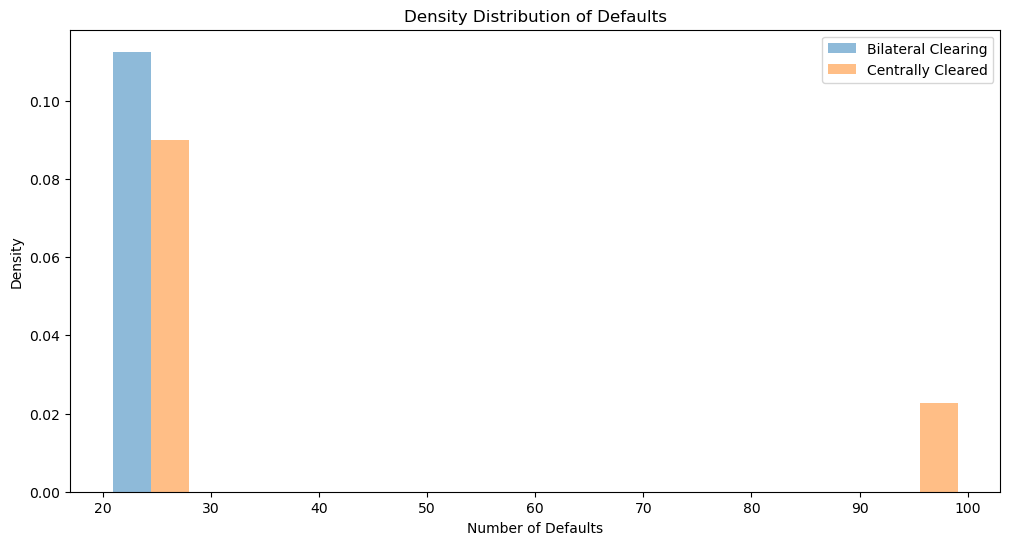

In [3]:
# Define the number of bins
bins = np.linspace(min(min(results_bilateral), min(results_central)), max(max(results_bilateral), max(results_central)), 10)

# Define histogram widths and centers
width = (bins[1] - bins[0]) * 0.4
center = (bins[:-1] + bins[1:]) / 2

# Plot histogram of results
plt.figure(figsize=(12, 6))

# Plot histogram for bilateral clearing simulation
plt.bar(center - width/2, np.histogram(results_bilateral, bins=bins, density=True)[0], align='center', width=width, alpha=0.5, label='Bilateral Clearing')

# Plot histogram for centrally cleared simulation
plt.bar(center + width/2, np.histogram(results_central, bins=bins, density=True)[0], align='center', width=width, alpha=0.5, label='Centrally Cleared')

plt.title('Density Distribution of Defaults')
plt.xlabel('Number of Defaults')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()


In [4]:
import pandas as pd

# Calculate summary statistics
mean_bilateral = np.mean(results_bilateral)
median_bilateral = np.median(results_bilateral)
std_dev_bilateral = np.std(results_bilateral)

mean_central = np.mean(results_central)
median_central = np.median(results_central)
std_dev_central = np.std(results_central)

# Create DataFrame
data = {'Mean': [mean_bilateral, mean_central],
        'Median': [median_bilateral, median_central],
        'Std Dev': [std_dev_bilateral, std_dev_central]}

df = pd.DataFrame(data, index=['Bilateral Clearing', 'Centrally Cleared'])

print(df)


                     Mean  Median    Std Dev
Bilateral Clearing  20.00    20.0   0.000000
Centrally Cleared   36.06    20.0  32.044912
